In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/traffic.csv')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Vehicles'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the window size for input sequences
window_size = 24

In [5]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [6]:
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)


In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1203/1203 [==============================] - 12s 4ms/step - loss: 0.0013
Epoch 2/10
1203/1203 [==============================] - 5s 4ms/step - loss: 6.7205e-04
Epoch 3/10
1203/1203 [==============================] - 5s 4ms/step - loss: 6.2197e-04
Epoch 4/10
1203/1203 [==============================] - 5s 4ms/step - loss: 5.9344e-04
Epoch 5/10
1203/1203 [==============================] - 5s 4ms/step - loss: 5.8136e-04
Epoch 6/10
1203/1203 [==============================] - 5s 4ms/step - loss: 5.6977e-04
Epoch 7/10
1203/1203 [==============================] - 5s 4ms/step - loss: 5.5652e-04
Epoch 8/10
1203/1203 [==============================] - 4s 4ms/step - loss: 5.5118e-04
Epoch 9/10
1203/1203 [==============================] - 5s 4ms/step - loss: 5.4257e-04
Epoch 10/10
1203/1203 [==============================] - 5s 4ms/step - loss: 5.3327e-04


In [9]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inve scale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

300/300 [==============================] - 1s 2ms/step


In [11]:
#converting 1d array to 2d for inverse trans

In [10]:
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

In [12]:
# Evaluate the model
train_rmse = np.sqrt(np.mean((train_predictions - scaler.inverse_transform(y_train_reshaped))**2))
test_rmse = np.sqrt(np.mean((test_predictions - scaler.inverse_transform(y_test_reshaped))**2))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 4.140136431050752
Test RMSE: 4.9762983954320665


In [13]:
import matplotlib.pyplot as plt


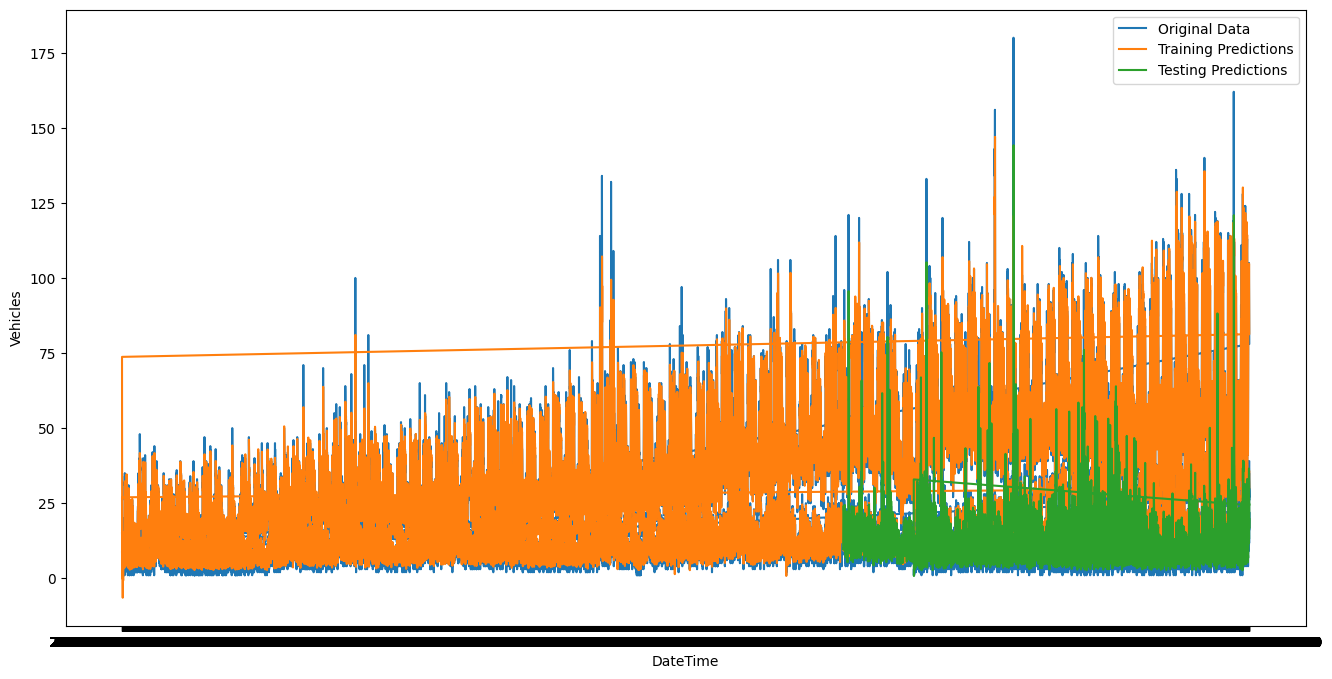

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(data['DateTime'], data['Vehicles'], label='Original Data')
plt.plot(data['DateTime'][:len(train_predictions)+window_size], np.append(np.full(window_size, np.nan), train_predictions.flatten()), label='Training Predictions')
plt.plot(data['DateTime'][len(train_predictions)+window_size:], np.append(np.full(window_size, np.nan), test_predictions.flatten()), label='Testing Predictions')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

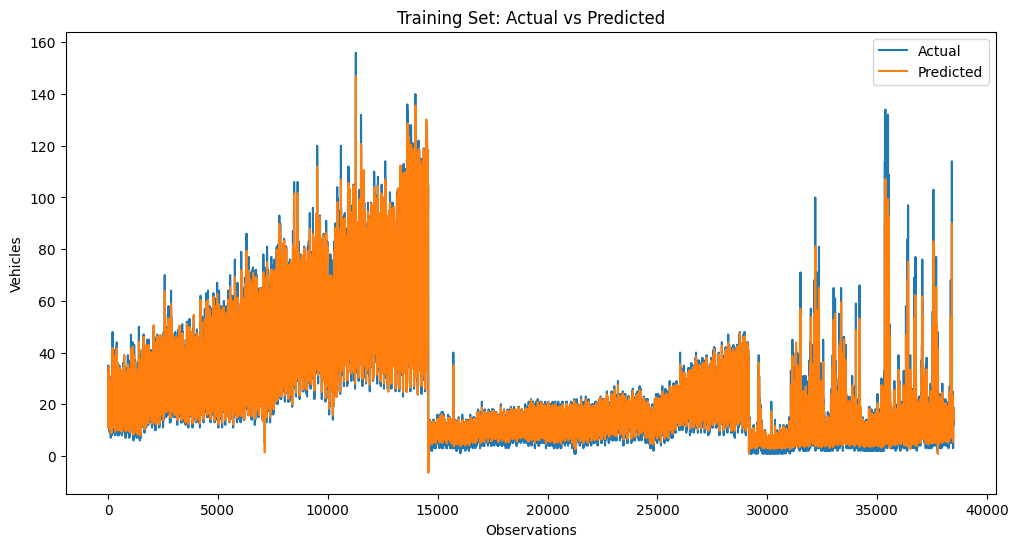

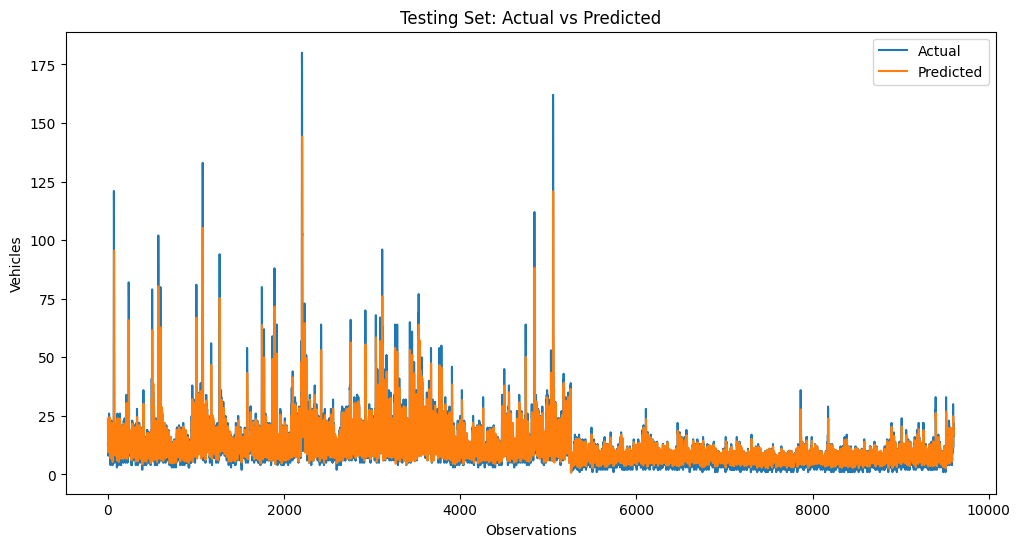

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_train_reshaped), label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# Plot actual vs predicted for testing set
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test_reshaped), label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel('Vehicles')
plt.legend()
plt.show()